In [181]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [182]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [183]:
train_ds = ImageDataGenerator(preprocessing_function=preprocess_input) \
.flow_from_directory(directory="../data/train", target_size=(224,224), batch_size=10, class_mode="sparse")
valid_ds = ImageDataGenerator(preprocessing_function=preprocess_input) \
.flow_from_directory(directory="../data/valid", target_size=(224,224), batch_size=10, class_mode="sparse")

Found 4091 images belonging to 75 classes.
Found 1498 images belonging to 75 classes.


In [184]:
imgs, labels = next(valid_ds)

In [185]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

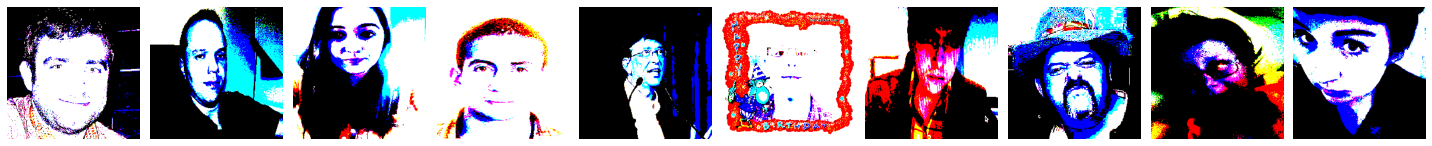

In [186]:
plotImages(imgs)

In [187]:
print(labels)

[27. 31. 16. 18. 51. 56. 13. 40. 10. 15.]


In [188]:
vgg16_model = VGG16()

In [189]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [190]:
model = keras.Sequential()

In [191]:
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [192]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [193]:
for layer in model.layers:
    layer.trainable = False

In [194]:
model.add(Dense(units=75, activation='softmax'))

In [195]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [202]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [204]:
with tf.device("/device:GPU:0"):
    hist = model.fit(x=train_ds,steps_per_epoch=len(train_ds),validation_data=valid_ds, validation_steps=len(valid_ds), epochs=10, verbose=2)

Epoch 1/10
410/410 - 36s - loss: 0.5666 - accuracy: 0.9399 - val_loss: 5.7343 - val_accuracy: 0.0521
Epoch 2/10
410/410 - 36s - loss: 0.5250 - accuracy: 0.9443 - val_loss: 5.7892 - val_accuracy: 0.0474
Epoch 3/10
410/410 - 36s - loss: 0.4889 - accuracy: 0.9533 - val_loss: 5.8421 - val_accuracy: 0.0434
Epoch 4/10
410/410 - 36s - loss: 0.4570 - accuracy: 0.9631 - val_loss: 5.9145 - val_accuracy: 0.0427
Epoch 5/10
410/410 - 36s - loss: 0.4248 - accuracy: 0.9660 - val_loss: 5.9600 - val_accuracy: 0.0481
Epoch 6/10
410/410 - 36s - loss: 0.3936 - accuracy: 0.9694 - val_loss: 6.0616 - val_accuracy: 0.0501
Epoch 7/10
410/410 - 36s - loss: 0.3695 - accuracy: 0.9731 - val_loss: 6.1224 - val_accuracy: 0.0481
Epoch 8/10
410/410 - 36s - loss: 0.3441 - accuracy: 0.9790 - val_loss: 6.1891 - val_accuracy: 0.0514
Epoch 9/10
410/410 - 36s - loss: 0.3229 - accuracy: 0.9792 - val_loss: 6.2449 - val_accuracy: 0.0494
Epoch 10/10
410/410 - 36s - loss: 0.2988 - accuracy: 0.9836 - val_loss: 6.2824 - val_accura